## Project IMHOTEP - detrending example


Notebook to illustrate how i detrend IMHOTEP data (linear detrending).
It calls functions from  my library of tools in libimhotep/libSLXclassIMHOTEP.py

#### Import modules

In [1]:
## standart libraries

import os,sys
import numpy as np

# xarray
import xarray as xr

# plot
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap

import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from matplotlib import cm 
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

import cartopy.feature as cfeature


# custom tools for plotting
sys.path.append('./')
from libimhotep import libSLXtoolsIMHOTEP as li


import cmocean

# for jupyter notebook display
%matplotlib inline

import pkg_resources


import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'hatch.color': '#086A87'})

# list packages to be checked
root_packages = [
     'numpy', 
    'matplotlib', 'cartopy', 'cmocean']

# print versions, but check if package is imported first
for m in pkg_resources.working_set:
    if m.project_name.lower() in root_packages:
        print(f"{m.project_name}=={m.version}")

Name: libimhotep.libSLXtoolsIMHOTEP
Package: libimhotep
This is a collection of  tools i often use when analysing the IMHOTEP project data.
numpy==1.20.0
matplotlib==3.3.4
cmocean==2.0
Cartopy==0.18.0


## Namelist

In [2]:
prefix = "eORCA025.L75-IMHOTEP"
nexp = "EGAI"
nexpREF = "ES"

varnarnf = 'sornf'
varnasss = 'sosaline'


# years to read data from:
y1='1980'
y2='2018'

fo="1y" # output frequency

# path for data (experiments)
diridat = li.Ffindinputdata(nexp,prefix=prefix,fo=fo)
diridref = li.Ffindinputdata(nexpREF,prefix=prefix,fo=fo)

# input directory on work for grid info
diri="/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/"

# plot directory
diro="/gpfswork/rech/cli/regi915/PLT/jan2023/1y/"

# data output directory
dirdat="/gpfswork/rech/cli/regi915/DAT/"

# full file names
sssfiles = li.Ffindinputdfiles(nexp,diridat,fo,prefix=prefix,fity="gridTsurf")
sssfilesREF = li.Ffindinputdfiles(nexpREF,diridref,fo,prefix=prefix,fity="gridTsurf")

# ======== RNF
# file list
rnffiles = li.Ffindinputdfiles(nexp,diridat,fo,prefix=prefix,fity="flxT")

#======= ICE
if nexp=='02':
    sifiles = diridat+"????/"+prefix+nexp+"*icemod.nc"
else:
    sifiles = diridat+"1m/????/"+prefix+"."+nexp+"*icemod.nc"


## Load and process data (SSS) 

In [3]:
print("======")
print('--- LOAD and PROCESS DATA over time period:')

# Prepare data loading
DIFF = li.imhov(sssfiles, varnasss,nexp,fo,y1,y2,dirigrid=diri,diff=True,sif='no',origin2=sssfilesREF,nexp2=nexpREF)

# Load and process (load data from 2 experiments and detrend)
DIFF.process()

# print some infos
print(DIFF.data.time_counter.isel(time_counter=0).values)
print(DIFF.data.time_counter.isel(time_counter=-1).values)
print("NT= "+str(DIFF.data.time_counter.size))

--- LOAD and PROCESS DATA over time period:
1980-07-02T00:00:00.000000000
2018-07-02T12:00:00.000000000
NT= 39


## Example plot of data before/after detrending for the 2 experiments to compare (GAI and ES in this case)

<function matplotlib.pyplot.show(close=None, block=None)>

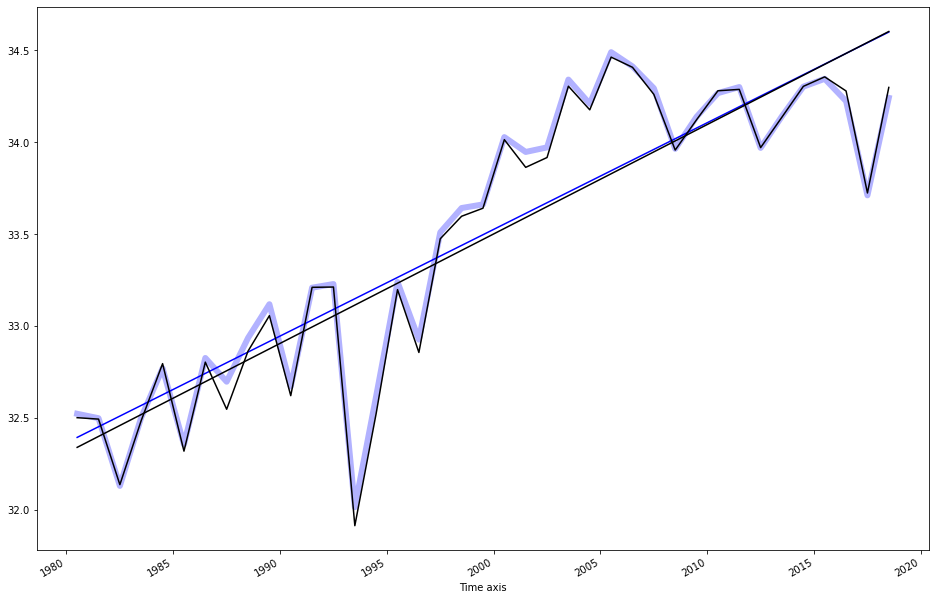

In [14]:
# select data at one example gridpoint
sssGAI    = DIFF.data.isel(x=1050,y=1050)
sssGAI_tr = DIFF.data.isel(x=1050,y=1050)-DIFF.data_dt.isel(x=1050,y=1050)
sssES    = DIFF.data2.isel(x=1050,y=1050)
sssES_tr = DIFF.data2.isel(x=1050,y=1050)-DIFF.data2_dt.isel(x=1050,y=1050)

# plot figure
fig3 = plt.figure(figsize=([16,10]),facecolor='white')
sssGAI.plot(linewidth=6,color='b',alpha=0.3)
sssGAI_tr.plot(color='b')
sssES.plot(color='k')
sssES_tr.plot(color='k')
plt.show